In [63]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [65]:
## distribution of each numeric colum

In [66]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [67]:
## plotting utility

import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1
        
    else:
    # general case of a 2D grid    
        i=j=0    
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


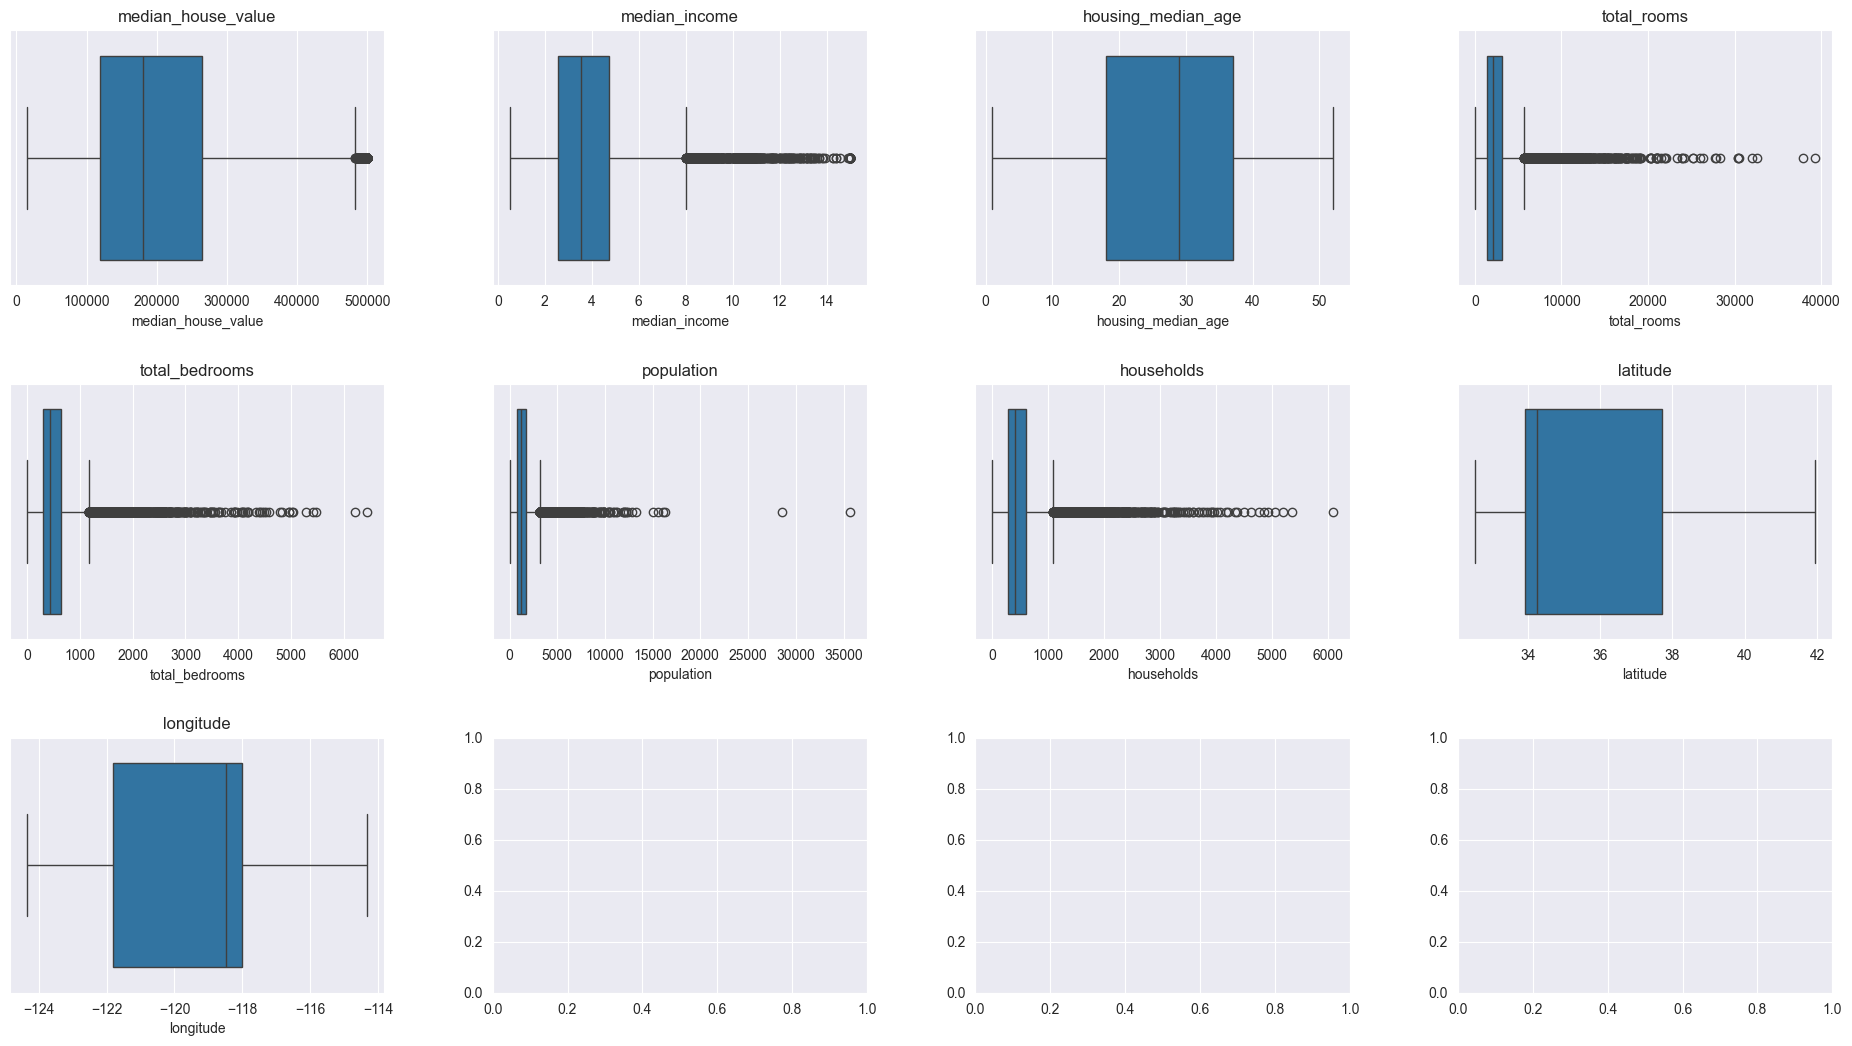

In [68]:
## your code here
plot_distributions(houses,houses.columns)

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


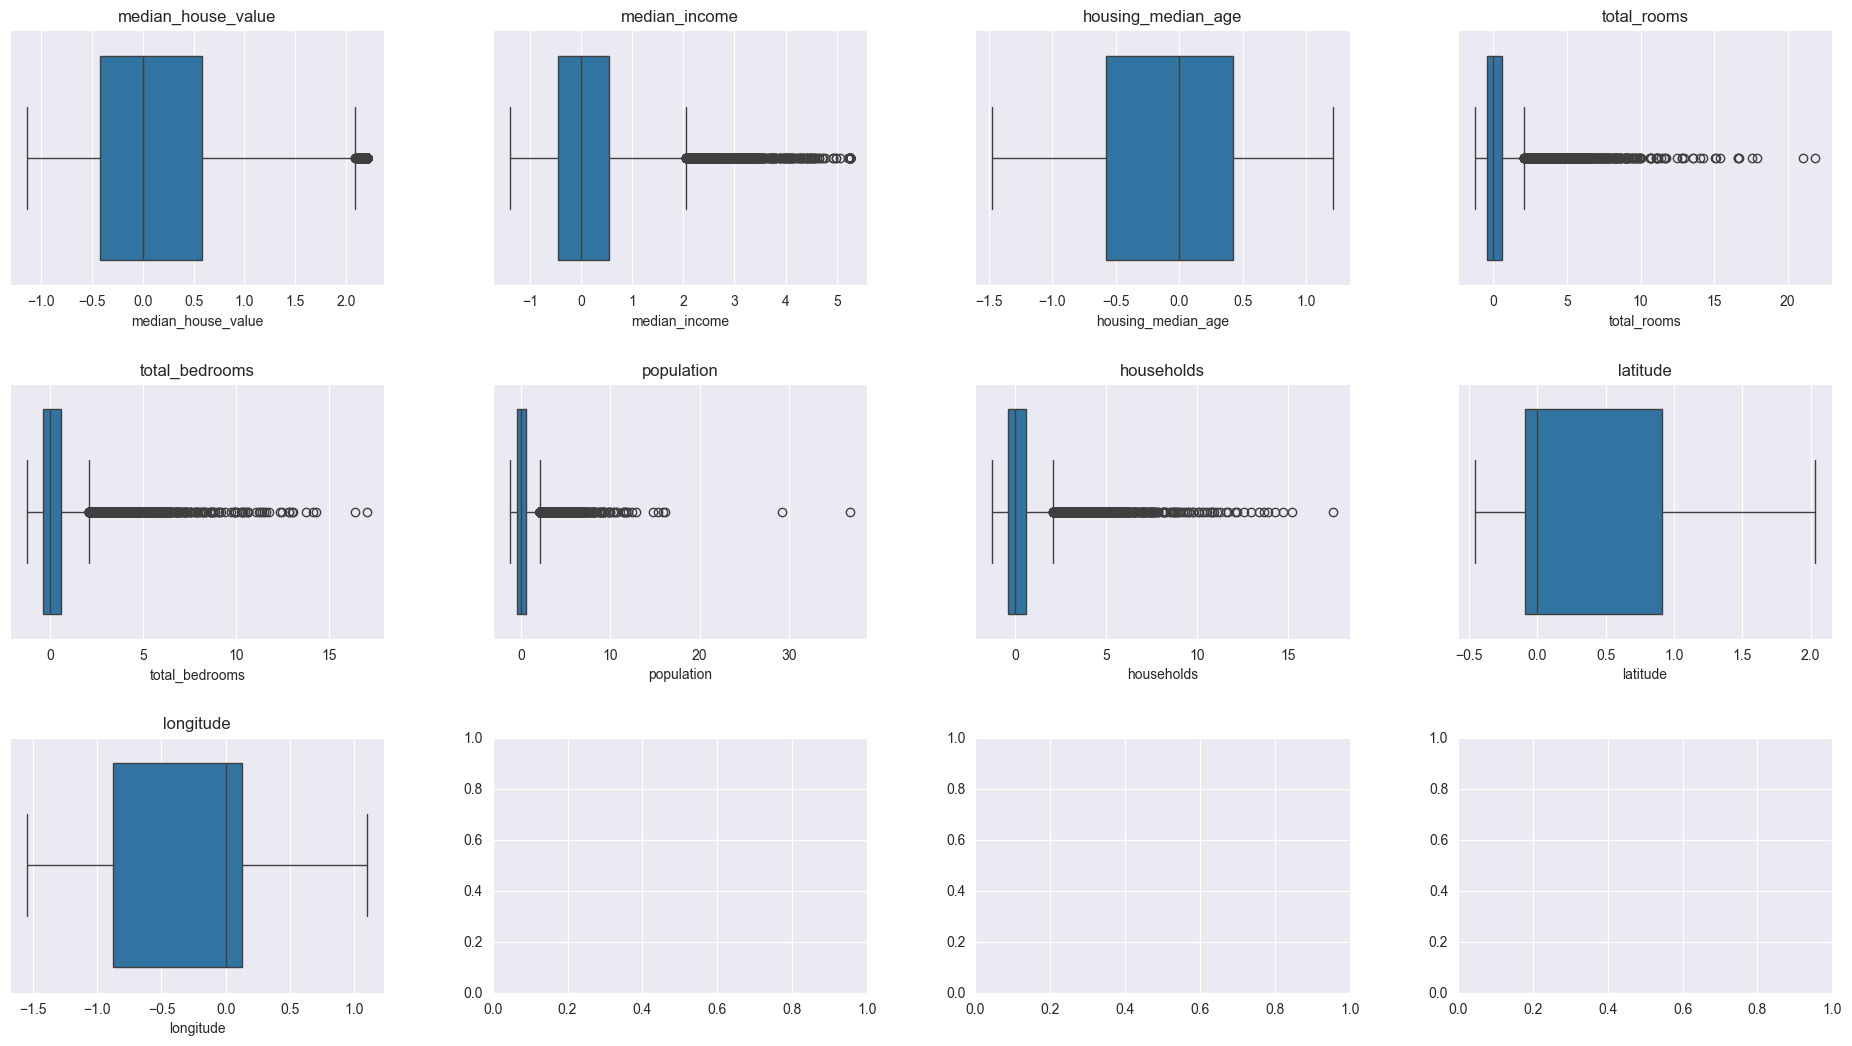

In [69]:
## normalising the features -- your code here
robust_scaler = RobustScaler()
# Using a robust scaler as it is more outlier resistant compared to the standard scaler
houses_robust_scaled = robust_scaler.fit_transform(houses)

houses_robust_scaled = pd.DataFrame(houses_robust_scaled, columns=houses.columns)

plot_distributions(houses_robust_scaled, houses_robust_scaled.columns)



### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [70]:
## your code here
percentage_sum = 0;
for column in houses_robust_scaled:
    # using z score calculation (z = (value - mean) / standard deviation)
    z = (houses_robust_scaled[column] - houses_robust_scaled[column].mean()) / houses_robust_scaled[column].std()
    # This is the number of standard deviations we can adjust this in order to see where the increase begins to slow
    threshold = 2.55
    # Z.abs is used to ensure that negative std is calculated the same as positive
    percentage_within_threshold = ((z.abs() <= threshold).sum() / len(z)) * 100
    print(f'for {column}, {percentage_within_threshold}% of values fall within {threshold} standard deviations')
    percentage_sum += percentage_within_threshold
print(f'average:{percentage_sum / len(houses_robust_scaled.columns)}')

for median_house_value, 100.0% of values fall within 2.55 standard deviations
for median_income, 97.75678294573643% of values fall within 2.55 standard deviations
for housing_median_age, 100.0% of values fall within 2.55 standard deviations
for total_rooms, 97.57751937984496% of values fall within 2.55 standard deviations
for total_bedrooms, 97.48546511627907% of values fall within 2.55 standard deviations
for population, 97.62596899224806% of values fall within 2.55 standard deviations
for households, 97.44186046511628% of values fall within 2.55 standard deviations
for latitude, 99.6608527131783% of values fall within 2.55 standard deviations
for longitude, 99.99515503875969% of values fall within 2.55 standard deviations
average:98.61595607235142


The change between 1std and 2std was a massive jump from and average of 70 to an average of 96. At 2.55, I decided to
stop increasing values as the change in % became very small. Removing using a threshold of 2.55 would mean removing
around 1.4% of data.

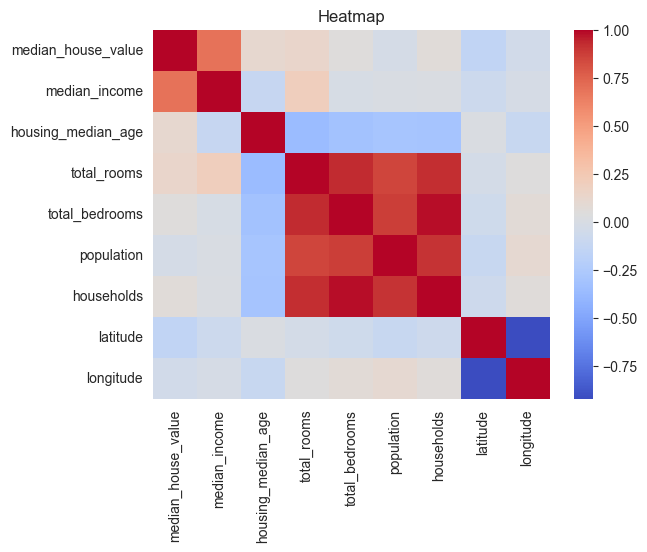

                    median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.688075            0.105623   
median_income                 0.688075       1.000000           -0.119034   
housing_median_age            0.105623      -0.119034            1.000000   
total_rooms                   0.134153       0.198050           -0.361262   
total_bedrooms                0.050594      -0.008093           -0.320485   
population                   -0.024650       0.004834           -0.296244   
households                    0.065843       0.013033           -0.302916   
latitude                     -0.144160      -0.079809            0.011173   
longitude                    -0.045967      -0.015176           -0.108197   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.024650    0.065843   
median_income          0.198050       -0.008093    0.004834    0.013033   
hous

In [71]:
# Importance of columns
sns.heatmap(houses_robust_scaled.corr(), cmap='coolwarm')
plt.title('Heatmap')
plt.show()
print(houses_robust_scaled.corr())

In [72]:
def get_outlier_indexes(column, threshold):
    z_scores = (column - column.mean()) / column.std()
    return z_scores[abs(z_scores) > threshold].index


threshold = 2.55

def get_indexes_for_dataset(dataset):
    all_outlier_indexes = []
    for col in dataset.columns:
        new_vales = get_outlier_indexes(dataset[col], threshold)
        for value in new_vales:
            # Check for duplicates
            if value not in all_outlier_indexes:
                all_outlier_indexes.append(value)
    return all_outlier_indexes



main_outliers = get_indexes_for_dataset(houses_robust_scaled)
print(f'number of outliers: {len(main_outliers)}')
# Reporting the indexes of outliers is required in the brief
print(main_outliers)

number of outliers: 1288
[131, 155, 407, 409, 494, 510, 511, 512, 514, 517, 923, 977, 986, 996, 1541, 1561, 1563, 1564, 1566, 1574, 1582, 1583, 1585, 1586, 1589, 1591, 1593, 1602, 1617, 1621, 1628, 1629, 1636, 1637, 1638, 1644, 1645, 1646, 1655, 2213, 2214, 2215, 2826, 2969, 3472, 3481, 3486, 3533, 3542, 3561, 3571, 3858, 3953, 4014, 4018, 4039, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4056, 4070, 4071, 4074, 4077, 4111, 4116, 4220, 4229, 4319, 4345, 4352, 4353, 4354, 4492, 4603, 4604, 4605, 4606, 4622, 4626, 4677, 4678, 5242, 5243, 5244, 5246, 5247, 5248, 5250, 5252, 5253, 5254, 5256, 5257, 5258, 5259, 5260, 5264, 5266, 5269, 5271, 5272, 5273, 5275, 5277, 5279, 5280, 5281, 5291, 5292, 5295, 5304, 5305, 5318, 5351, 5352, 5360, 5361, 5368, 5493, 5494, 5537, 5728, 5738, 6073, 6204, 6226, 6374, 6389, 6391, 6392, 6399, 6551, 6556, 6557, 6576, 6578, 6585, 6590, 6591, 6592, 6593, 6594, 6712, 6720, 6724, 6725, 6726, 6727, 6728, 6729, 6731, 6732, 6735, 6736, 6915, 6918, 6919, 8311, 8578

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


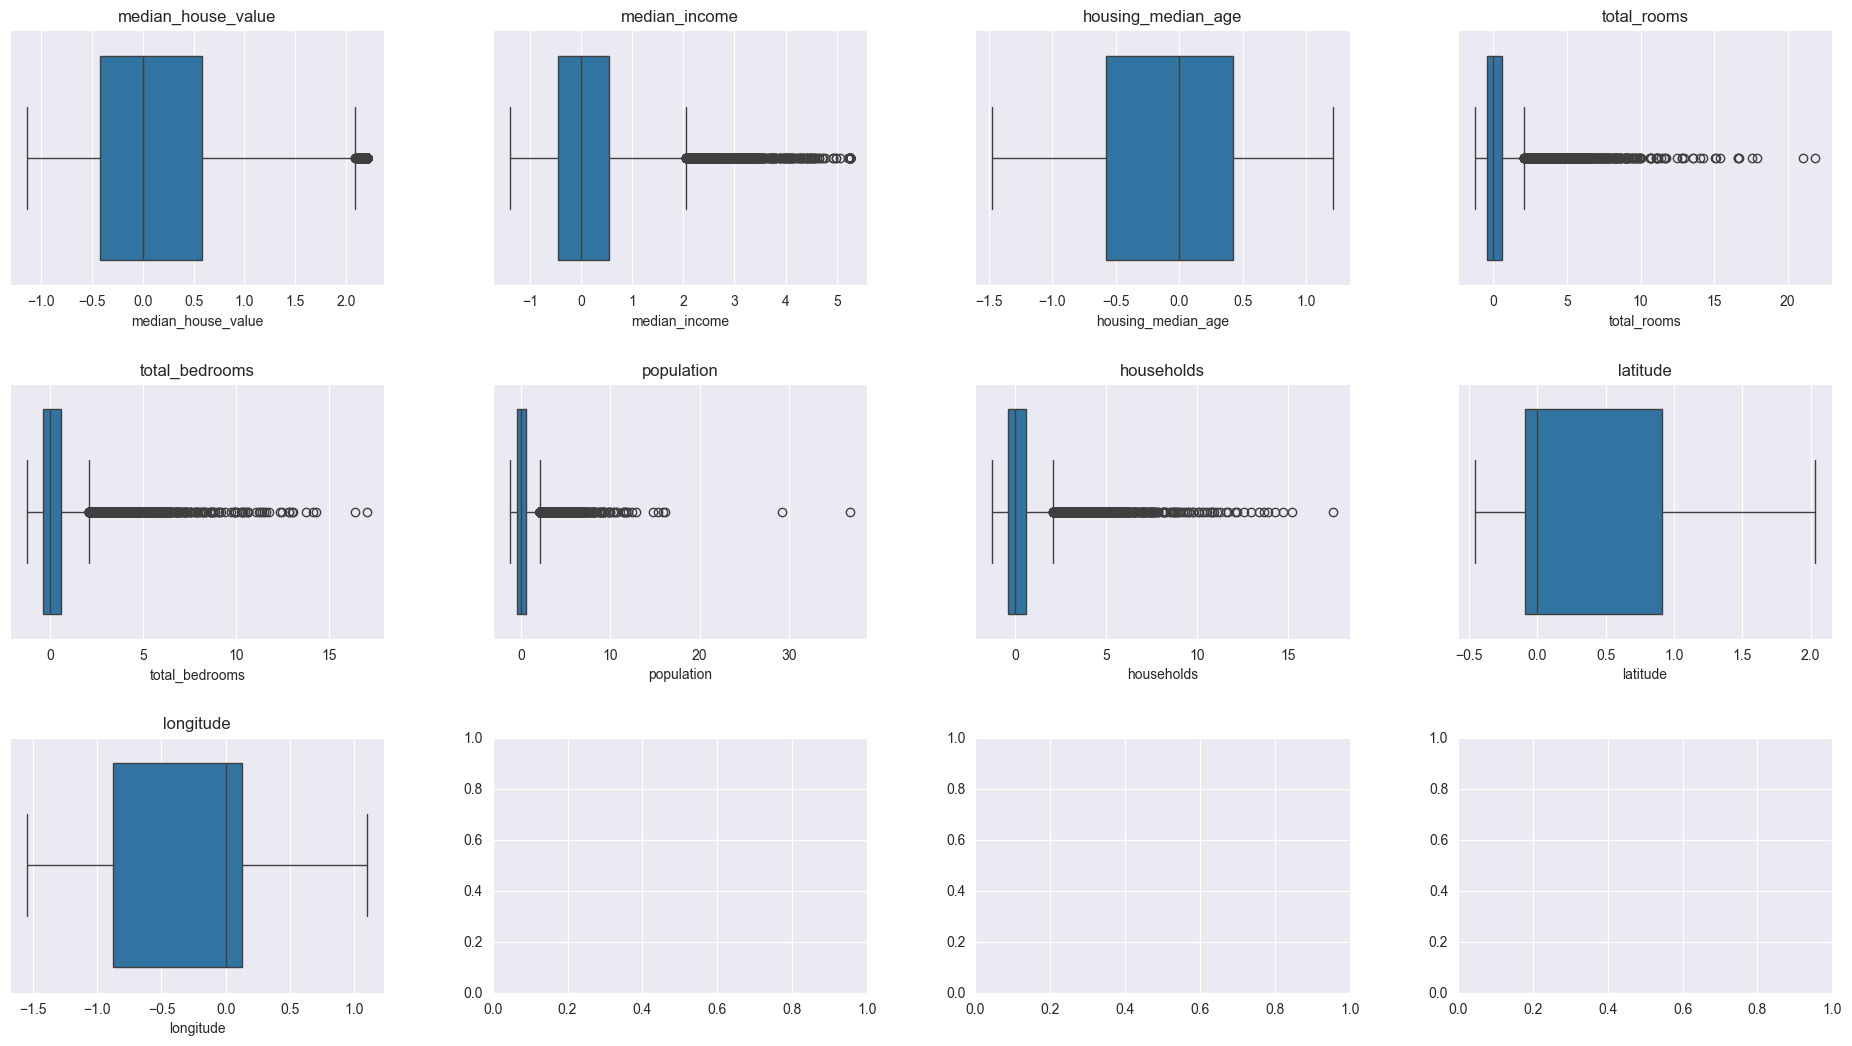

In [73]:
# Remove outliers
houses_robust_scaled.drop(main_outliers)
plot_distributions(houses_robust_scaled, houses_robust_scaled.columns)

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

I wanted to only keep one of either total_rooms or total bedrooms as I believed that having two columns related to rooms
would lead to a model that would hold room amount as twice as important as other aspects.
While total_rooms has a higher correlation to price, most houses are priced based off of their number of bedrooms,
therefore I will only be keeping number of bedrooms in my main dataset

In [74]:
#dropping from both datasets to help with comparisons
houses.drop(columns='total_rooms', axis=1, inplace=True)
houses_robust_scaled.drop(columns='total_rooms', axis=1, inplace=True)

Text(0.5, 1.0, 'After removal of outliers')

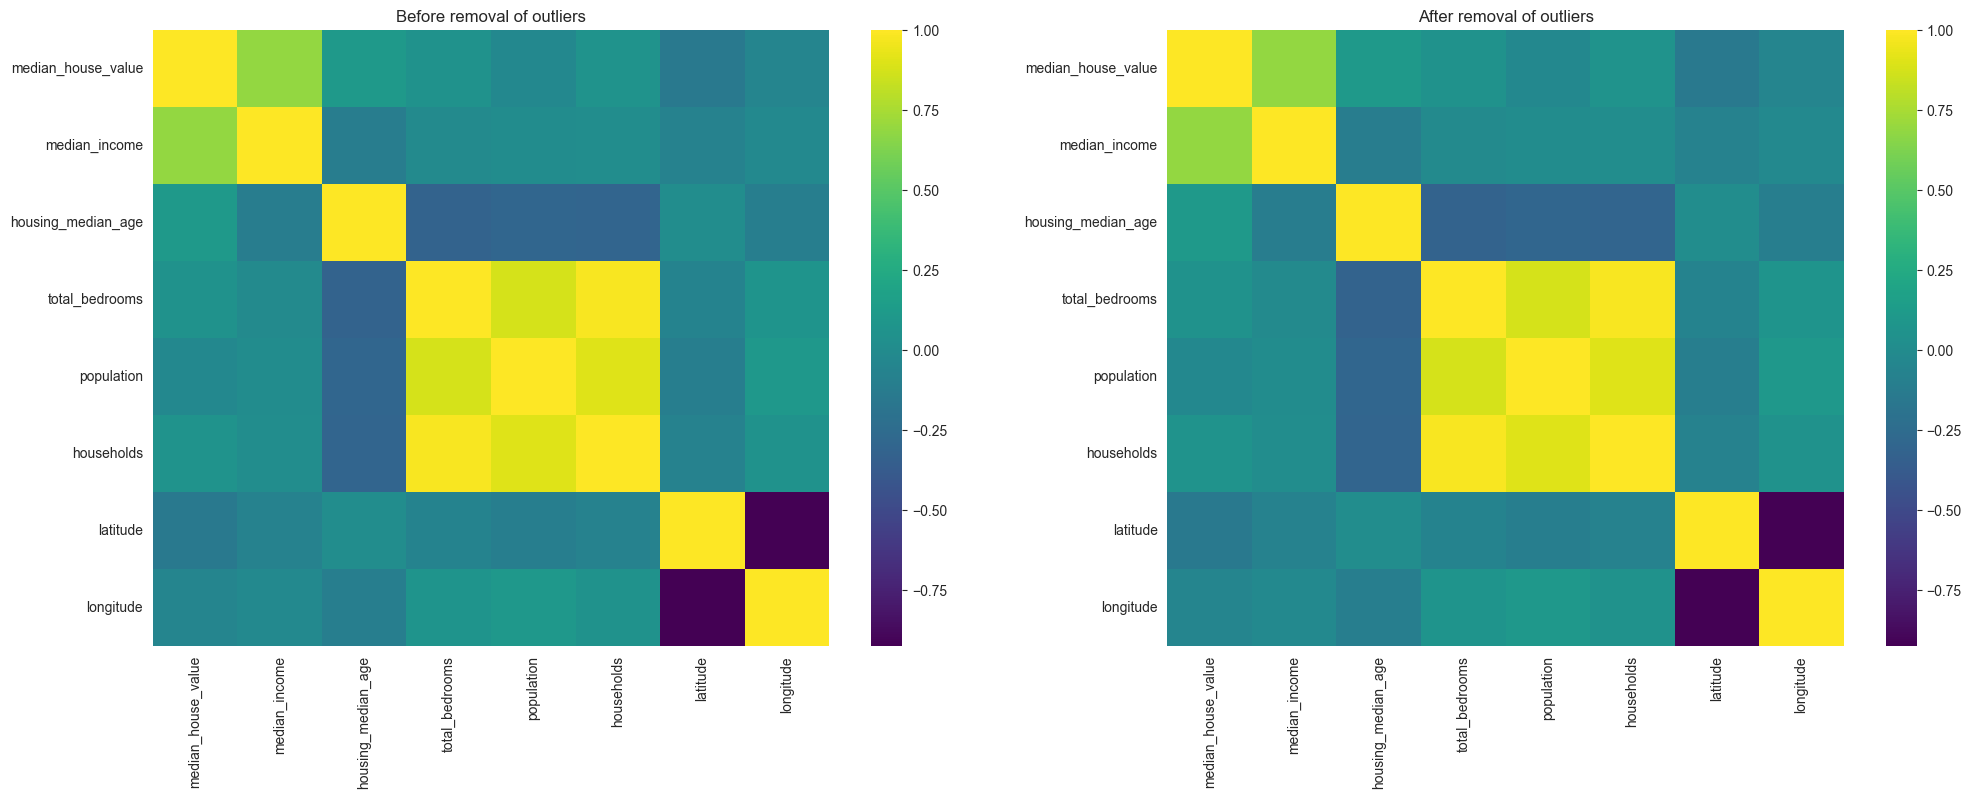

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
sns.heatmap(houses.corr(), cmap='viridis', ax=axes[0])
sns.heatmap(houses_robust_scaled.corr(), cmap='viridis', ax=axes[1])
axes[0].set_title('Before removal of outliers')
axes[1].set_title('After removal of outliers')

Using correlation matrices we can visually see that both before and after our preprocessing steps, our value correlation remains mostly the same.
This is a good indication that our preprocessing hasn't altered the overall quality of our data or at least that there aren't any major differences that would drastically alter the results
of models created with this data.

it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [76]:
from sklearn.neighbors import LocalOutlierFactor
# Our outlier detection model, n can be adjusted to fine tune detection
# We will fit our lof to the number of outliers to the same size as our initial prediction so that the quantity matches up as this is our expected percentage of outliers
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.0624)
X = houses_robust_scaled.copy()

# Fit the model and predict outliers
outlier_values = lof.fit_predict(X)
main_outliers_lof = []
counter = 0
for i in outlier_values:
    if i == -1:
        main_outliers_lof.append(counter)
    counter+=1
# Get the indexes of the outliers
print(f'lof size: {len(main_outliers_lof)} pred size: {len(main_outliers)}')

lof size: 1288 pred size: 1288


In [121]:
## your code here
# Compare results
counter = 0
for i in main_outliers_lof:
    if i in main_outliers:
        counter+=1
print(f'{counter} values match between predicted and lof giving a {round(((counter / 1288) * 100), 2)}% match')


259 values match between predicted and lof giving a 20.11% match


While we have matched up the number of outliers, we can see that using LOF our actual indexes are 23% similar. This is not a good indication when it comes to trusting our
inital outlier detection

In [150]:
# Because of this result I decided to also try KNN to see if our outliers fit any better when using this method
from sklearn.neighbors import NearestNeighbors
# I placed this within a function so that I could test for which parameters are best when matching to my prediction
def create_knn_model(neighbors, percentile):
    # Create our classifier, number of neighbors checked can be adjusted
    knn = NearestNeighbors(n_neighbors=neighbors)
    knn.fit(houses_robust_scaled)
    distances, _= knn.kneighbors(houses_robust_scaled)
    outlier_scores = np.max(distances, axis=1)
    percentile_threshold = np.percentile(outlier_scores, percentile)
    outliers = np.where(outlier_scores > percentile_threshold)[0]
    return outliers


In [152]:
# Compare against initial results
def compare_results(main_outliers_knn, initial_values, n_number):
    matches = 0
    for i in main_outliers_knn:
        if i in initial_values:
            matches +=1
    print(f'using: {n_number} {matches} values match between predicted and knn giving a {round(((matches / 1288) * 100), 2)}% match')

In [153]:
# Test for best n_neighbors value for matching our predicted set
# Warning this takes a while to run
for i in range(1,100):
    # 93.76 is used as it gives us 1288 values which matches the number of values predicted above
    main_outliers_knn = create_knn_model(i,93.76)
    compare_results(main_outliers_knn, main_outliers, i)

using: 1 0 values match between predicted and knn giving a 0.0% match
using: 2 594 values match between predicted and knn giving a 46.12% match
using: 3 633 values match between predicted and knn giving a 49.15% match
using: 4 662 values match between predicted and knn giving a 51.4% match
using: 5 704 values match between predicted and knn giving a 54.66% match
using: 6 719 values match between predicted and knn giving a 55.82% match
using: 7 730 values match between predicted and knn giving a 56.68% match
using: 8 737 values match between predicted and knn giving a 57.22% match
using: 9 741 values match between predicted and knn giving a 57.53% match
using: 10 751 values match between predicted and knn giving a 58.31% match
using: 11 757 values match between predicted and knn giving a 58.77% match
using: 12 761 values match between predicted and knn giving a 59.08% match
using: 13 769 values match between predicted and knn giving a 59.7% match
using: 14 778 values match between predi

Typically, I would use values between 15 and 30, with a dataframe with 20000 elements I wanted to see if a larger
sample would affect how the prediction matched my STD based outliers. Un-surprisingly as you increase the
number of neighbors compared the more the knn model matches my initial prediction.

If anything this loop simply displays the way that the smoothing affect moves knn away from local variation and
more towards matching the global variation of the data.

However, it is suggested that using a higher amount of neighbors reduces the amount of overfitting within the model
because of the fact it isn't as susceptible to local trends within the dataset

## Your overall conclusions here